In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.base import BaseEstimator
from scipy import stats
import seaborn as sns
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:

import pandas as pd
test = pd.read_csv('NB15_testing-set.csv')
train = pd.read_csv('NB15_training-set.csv')
feature_desc = pd.read_csv('NB15_features.csv', encoding='cp1252')

print(train.columns.tolist())

train

['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label']


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [4]:
train.shape
test.shape

(82332, 45)

C:\Users\zalak\AppData\Local\Temp\ipykernel_24528\3198364736.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_encoded[column] = le.fit_transform(train_encoded[column].astype(str))
C:\Users\zalak\AppData\Local\Temp\ipykernel_24528\3198364736.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_encoded[column] = le.fit_transform(test_encoded[column].astype(str))
C:\Users\zalak\AppData\Local\Temp\ipykernel_24528\3198364736.py:27: UserWarning: set_ticklabels() should only be used with a fixed num

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5')]

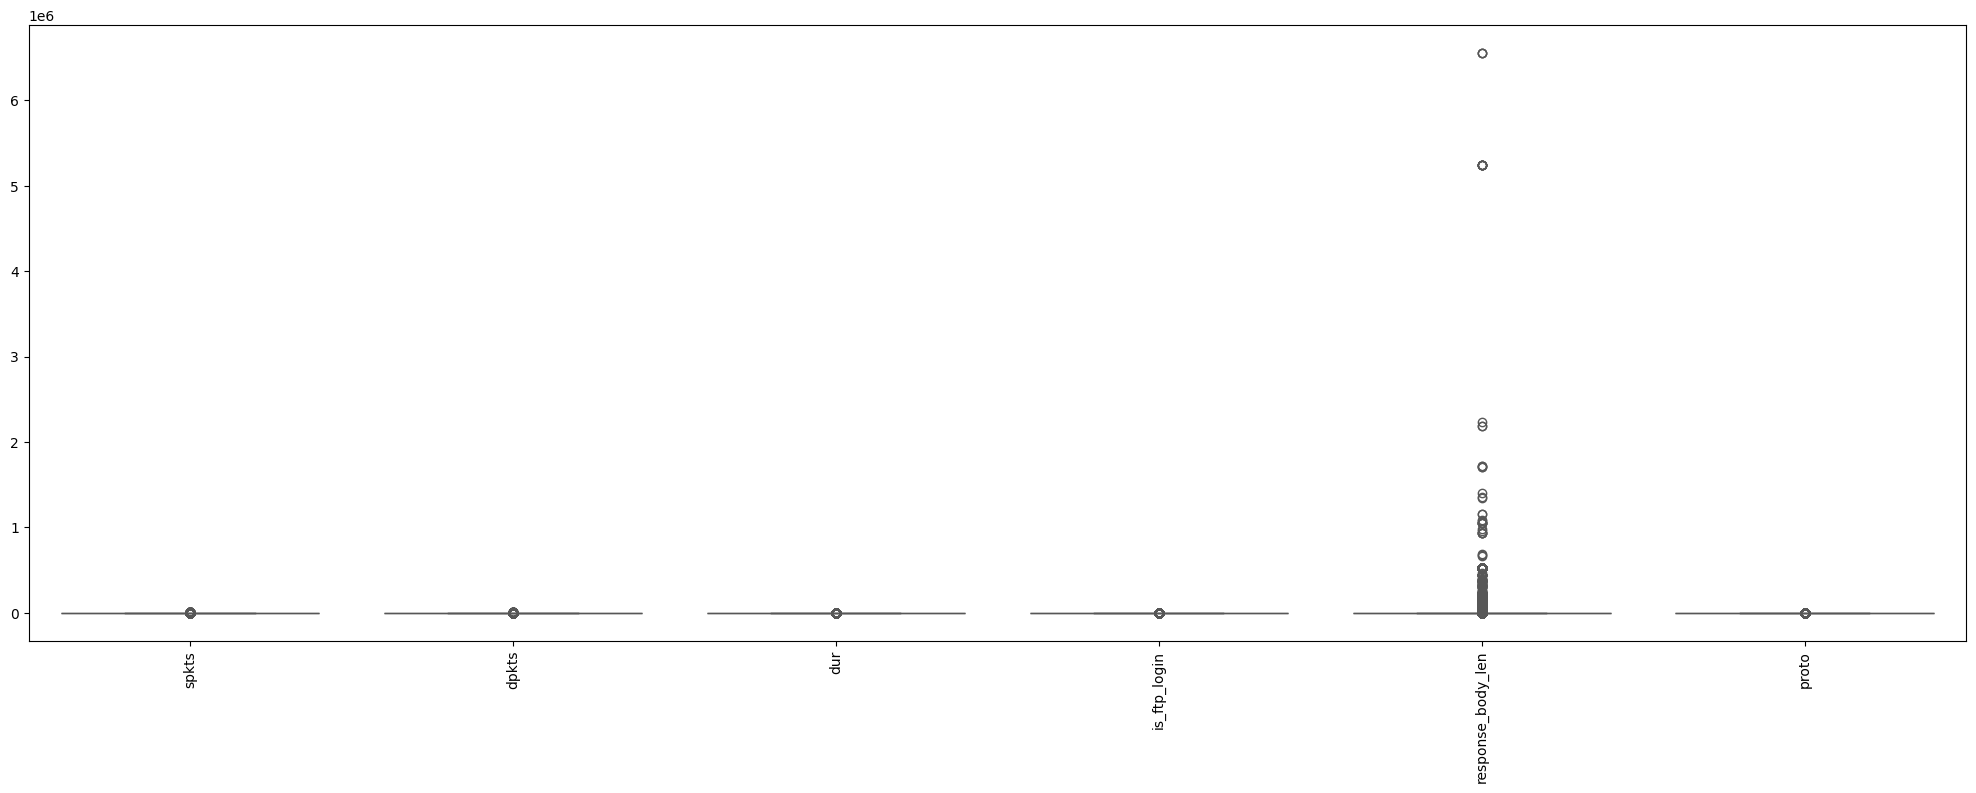

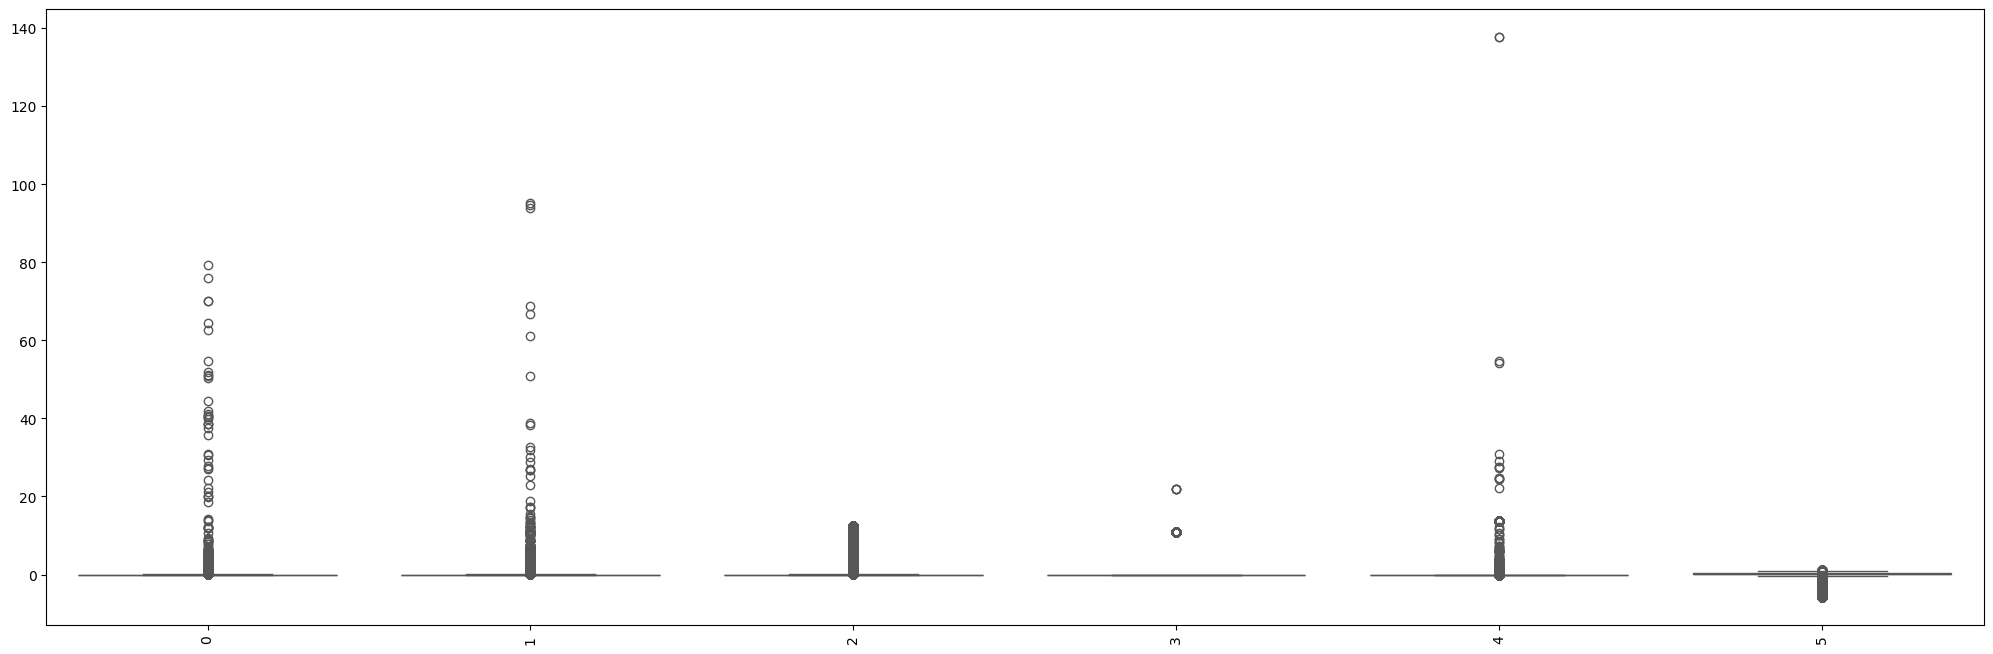

In [5]:
features = ['spkts', 'dpkts', 'dur','is_ftp_login',
            'response_body_len', 'proto']

#train_encoded = pd.DataFrame(train.drop(features, axis = 1).values)
train_encoded = train[features]
test_encoded = test[features]

label_encoders = {}
for column in train_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    train_encoded[column] = le.fit_transform(train_encoded[column].astype(str))
    label_encoders[column] = le

for column in test_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    test_encoded[column] = le.fit_transform(test_encoded[column].astype(str))
    label_encoders[column] = le

train_scaler = StandardScaler()
clean_train = pd.DataFrame(train_scaler.fit_transform(train_encoded))

test_scaler = StandardScaler()
clean_test = pd.DataFrame(test_scaler.fit_transform(test_encoded))

plt.figure(figsize = (25,8))
u = sns.boxplot(palette = 'cool', data=train_encoded)
u.set_xticklabels(u.get_xticklabels(),rotation=90)

plt.figure(figsize = (25,8))
u = sns.boxplot(palette = 'cool', data=clean_test)
u.set_xticklabels(u.get_xticklabels(),rotation=90)


C:\Users\zalak\AppData\Local\Temp\ipykernel_24528\411510202.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  u.set_xticklabels(u.get_xticklabels(),rotation=90)


[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5')]

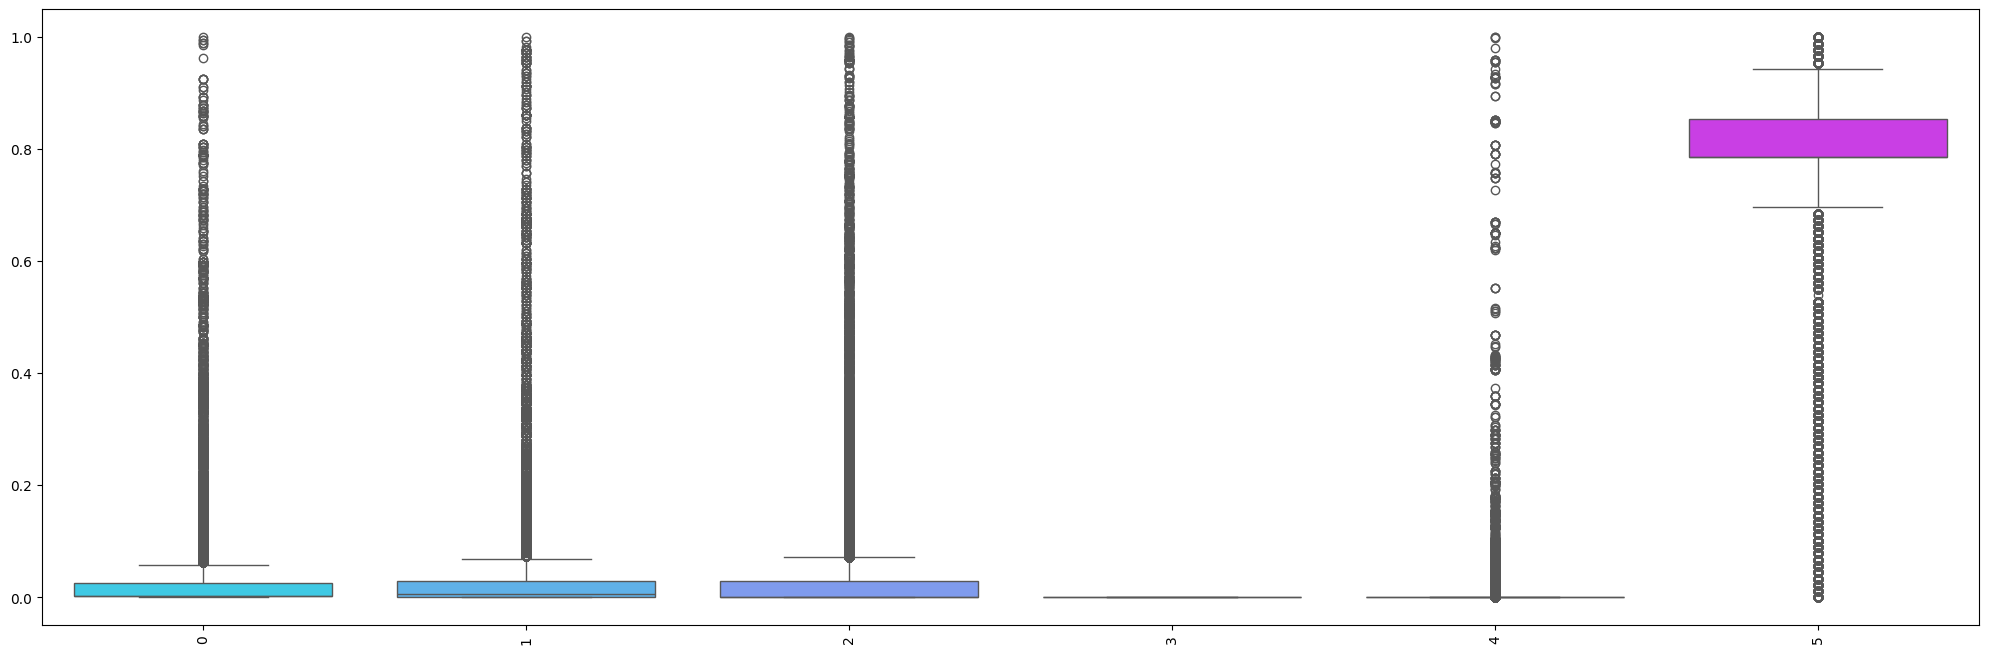

In [6]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(train_encoded))

X_train_df = clean_train
X_test_df =  clean_test

y_train = train[['label']]
y_test = test[['label']]

# Apply Z-score filter on X_train
z_scores_train = np.abs(stats.zscore(X_train_df))
train_mask = (z_scores_train < 3).all(axis=1)
X_train_filtered = X_train_df[train_mask]
y_train_filtered = y_train[train_mask]  # no .iloc or .values

# Apply Z-score filter on X_test
z_scores_test = np.abs(stats.zscore(X_test_df))
test_mask = (z_scores_test < 3).all(axis=1)
X_test_filtered = X_test_df[test_mask]
y_test_filtered =  y_test[test_mask]  # no .iloc or .values


#Aggressively scale standardise data for fairness
ro_scaler = RobustScaler()
scaler = MinMaxScaler()

X_train_filtered = ro_scaler.fit_transform(X_train_filtered)
X_test_filtered = ro_scaler.fit_transform(X_test_filtered)

X_train_filtered = pd.DataFrame(scaler.fit_transform(X_train_filtered))
X_test_filtered = pd.DataFrame(scaler.fit_transform(X_test_filtered))

plt.figure(figsize = (25,8))
u = sns.boxplot(palette = 'cool', data=X_train_filtered)
u.set_xticklabels(u.get_xticklabels(),rotation=90)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Split your final data again if needed
X_train, X_val, y_train, y_val = train_test_split(
    X_train_filtered, y_train_filtered, test_size=0.2, random_state=42
)

# Define the model
mlp_model = Sequential([
    Input(shape=(X_train.shape[1],)),                    # Input layer
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')  # Use softmax with units=num_classes for multi-class
])

# Compile the model
mlp_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',    # use 'categorical_crossentropy' for multi-class
    metrics=['accuracy']
)

# Early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model
history = mlp_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate on test set
test_loss, test_acc = mlp_model.evaluate(X_test_filtered, y_test_filtered, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/20
2011/2011 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7883 - loss: 0.4536 - val_accuracy: 0.8952 - val_loss: 0.3062
Epoch 2/20
2011/2011 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8838 - loss: 0.3015 - val_accuracy: 0.8881 - val_loss: 0.3178
Epoch 3/20
2011/2011 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8869 - loss: 0.2908 - val_accuracy: 0.8805 - val_loss: 0.2947
Epoch 4/20
2011/2011 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8895 - loss: 0.2849 - val_accuracy: 0.8991 - val_loss: 0.2925
Epoch 5/20
2011/2011 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8897 - loss: 0.2839 - val_accuracy: 0.9009 - val_loss: 0.2538
Epoch 6/20
2011/2011 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8923 - loss: 0.2794 - val_accuracy: 0.8823 - val_loss: 0.2917
Epoch 7/20
2011/2011 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8924 - loss: 0.2776 - val_accuracy: 0.8721 - val_loss: 0.3425
Epoch 8/20
2011/2011 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8909 - loss: 0

2412/2412 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8986 - loss: 0.2685
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8986 - loss: 0.2685
Train Accuracy: 0.7181
Val Accuracy:   0.7181


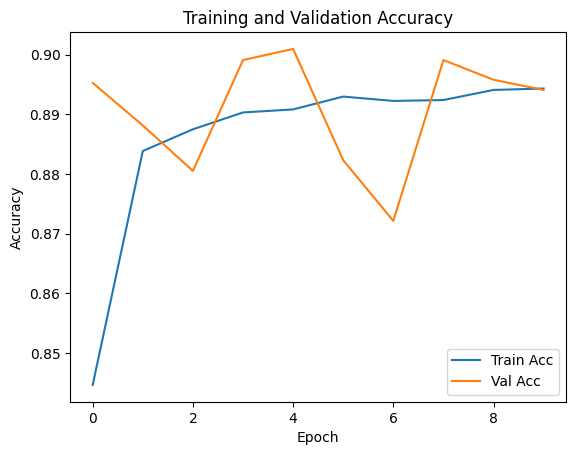

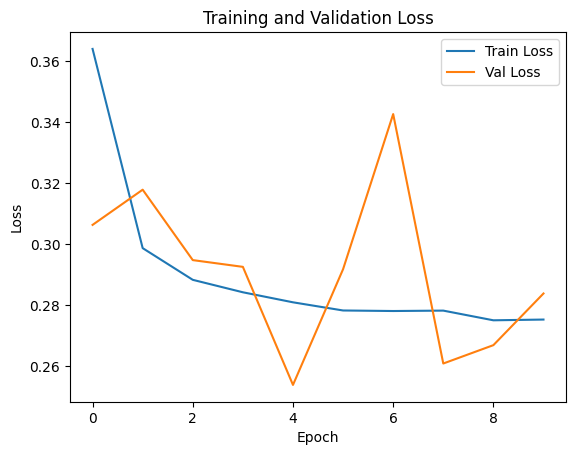

In [8]:
train_loss, train_acc = mlp_model.evaluate(X_test_filtered, y_test_filtered, verbose=1)
val_loss, val_acc = mlp_model.evaluate(X_test_filtered, y_test_filtered, verbose=1)

val_losses = []
train_losses = []

train_losses.append(train_loss)
val_losses.append(val_loss)


print(f"Train Accuracy: {train_acc:.4f}")
print(f"Val Accuracy:   {val_acc:.4f}")

# Plot learning curves
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot loss curves over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()


In [9]:
def predict_access_vector(model : BaseEstimator, input_dict : dict, label_encoders : dict):
    
    encoded_input = encode_user_input(input_dict, label_encoders)
    encoded_input_df = pd.DataFrame([encoded_input])
    prediction = model.predict(encoded_input_df)
    
    return prediction

def encode_user_input(input_dict: dict, label_encoders: dict) -> dict:
    encoded = {}
    for key, value in input_dict.items():
        if key in label_encoders:
            try:
                encoded[key] = label_encoders[key].transform([value])[0]
            except ValueError:
                raise ValueError(f"Value '{value}' for feature '{key}' was not seen during training.")
        else:
            encoded[key] = value  # leave numeric features as is
    return encoded


def print_prediction(prediction: str, user_input: dict):
    print("=== Input Features ===")
    for feature_name, feature_series in user_input.items():
        # Extract scalar value from Series
        value = feature_series.iloc[0] if hasattr(feature_series, 'iloc') else feature_series
        print(f"{feature_name:<25}: {value}")
    
    print("\n=== Predicted Impact ===")
    if prediction[0][0] == 1:
        print("Irregular activity, possible cyber breach!")
    else:
        print("No sign of unusual activity")

In [58]:
user_input = {
    'spkts': 3,
    'dpkts': 3,
    'dur': 10,
    'response_body_len': 0,
    'proto': 'tcp',
    'is_ftp_login': 1
}

prediction = predict_access_vector(mlp_model, user_input, label_encoders)
print_prediction(prediction, user_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
=== Input Features ===
spkts                    : 3
dpkts                    : 3
dur                      : 10
response_body_len        : 0
proto                    : tcp
is_ftp_login             : 1

=== Predicted Impact ===
Irregular activity, possible cyber breach!


C:\Users\zalak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Shape of X_train: (128641, 6)
Columns in X_train: [0, 1, 2, 3, 4, 5]
Yo my guy ur kinda sus


InvalidModelError: Model type not yet supported by TreeExplainer: <class 'keras.src.models.sequential.Sequential'>